In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1xD33gESZ-8zT6xjLuUe7gkkOxkY32H1y -O flower.tif
!wget --no-check-certificate https://drive.google.com/uc?id=1_tqP_Hi2gNNx9kGRrO0jjmdtwWqHHKUe -O stratified.jpg
!wget --no-check-certificate https://drive.google.com/uc?id=19UUYFiiF9IWRVs_KjPzFWrjryKV6R_CY -O lacelike.jpg
!wget --no-check-certificate https://drive.google.com/uc?id=1L_teBiGuVILK3KIwFmzy62lbkwxLz045 -O waffled.jpg
!wget --no-check-certificate https://drive.google.com/uc?id=1DVmm07AuvgXwly6v7s_4VkF73opaDNoM -O frilly.jpg

--2024-12-05 20:02:14--  https://drive.google.com/uc?id=1xD33gESZ-8zT6xjLuUe7gkkOxkY32H1y
Resolving drive.google.com (drive.google.com)... 173.194.174.139, 173.194.174.113, 173.194.174.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1xD33gESZ-8zT6xjLuUe7gkkOxkY32H1y [following]
--2024-12-05 20:02:14--  https://drive.usercontent.google.com/download?id=1xD33gESZ-8zT6xjLuUe7gkkOxkY32H1y
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5769832 (5.5M) [application/octet-stream]
Saving to: ‘flower.tif’

flower.tif          100%[===================>]   5.50M  --.-KB/s    in 0.03s   

2024-12-05 20:02:18 (185 MB/s) 

In [ ]:
# importing necessary packages
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

# 1. GLCM (Gray-Level Co-occurrence Matrix)

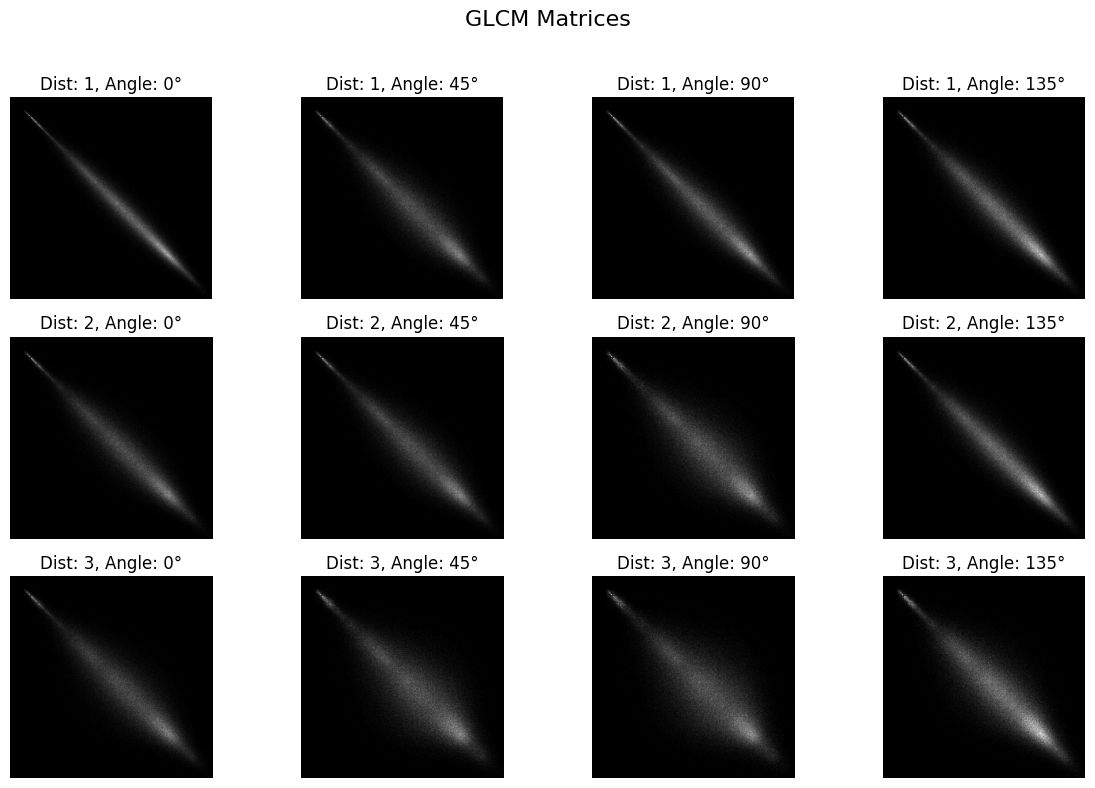

GLCM Features:
Contrast: [[ 130.55527161  442.13837363  283.45527788  279.2681783 ]
 [ 364.32573323  442.13837363  771.74019637  279.2681783 ]
 [ 585.69151756  996.12973647 1148.93414141  666.42585822]]
Correlation: [[0.96952563 0.89678349 0.93386213 0.93480595]
 [0.91491344 0.89678349 0.81989412 0.93480595]
 [0.86314447 0.76727892 0.73177358 0.84431141]]
Energy: [[0.01355987 0.00990584 0.01098731 0.01111703]
 [0.01053718 0.00990584 0.00873308 0.01111703]
 [0.00942827 0.00824389 0.00797942 0.00917073]]
Homogeneity: [[0.14858427 0.08439252 0.10198271 0.10024857]
 [0.09414008 0.08439252 0.06502363 0.10024857]
 [0.07554    0.05766453 0.0532072  0.07039091]]
Dissimilarity: [[ 8.14662229 15.33325403 12.31248742 12.14302708]
 [13.69833333 15.33325403 20.32752273 12.14302708]
 [17.42299859 23.13284182 24.97944242 18.63650387]]



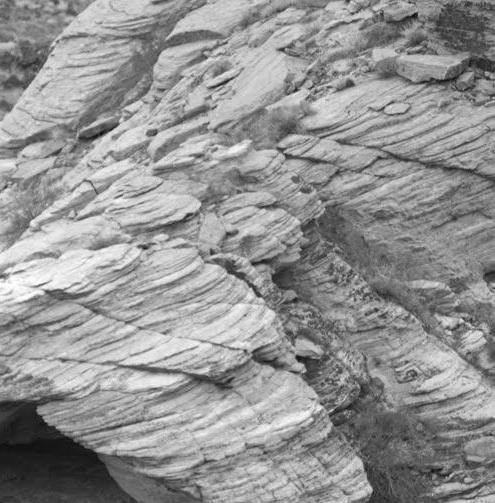

In [ ]:
from skimage.feature import graycomatrix, graycoprops

# Compute GLCM and extract features
def compute_glcm_features(gray_image, distances, angles):
    glcm = graycomatrix(
        gray_image,
        distances=distances,
        angles=angles,
        levels=256,  # 8-bit image has 256 levels
        symmetric=True,
        normed=True
    )

    # Extract features
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')

    features = {
        'Contrast': contrast,
        'Correlation': correlation,
        'Energy': energy,
        'Homogeneity': homogeneity,
        'Dissimilarity': dissimilarity
    }

    return glcm, features

# Visualize GLCM and features
def visualize_glcm(glcm, features, distances, angles):
    num_angles = len(angles)
    num_distances = len(distances)

    # Plot the GLCM
    fig, axs = plt.subplots(num_distances, num_angles, figsize=(12, 8))
    fig.suptitle("GLCM Matrices", fontsize=16)

    for i, distance in enumerate(distances):
        for j, angle in enumerate(angles):
            ax = axs[i, j]
            glcm_matrix = glcm[:, :, i, j]
            ax.imshow(glcm_matrix, cmap='gray')
            ax.set_title(f"Dist: {distance}, Angle: {np.degrees(angle):.0f}°")
            ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Display GLCM features
    print("GLCM Features:")
    for feature_name, values in features.items():
        print(f"{feature_name}:", features[feature_name])
    print()


# Parameters
image_path = "stratified.jpg"  # Replace with the path to your image
distances = [1, 2, 3]  # Pixel distances
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles in radians

# Preprocess the image
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Compute GLCM and features
glcm, features = compute_glcm_features(gray_image, distances, angles)

# Visualize GLCM and features
visualize_glcm(glcm, features, distances, angles)

cv2_imshow(gray_image)


# 2. Local Binary Patterns (LBP)

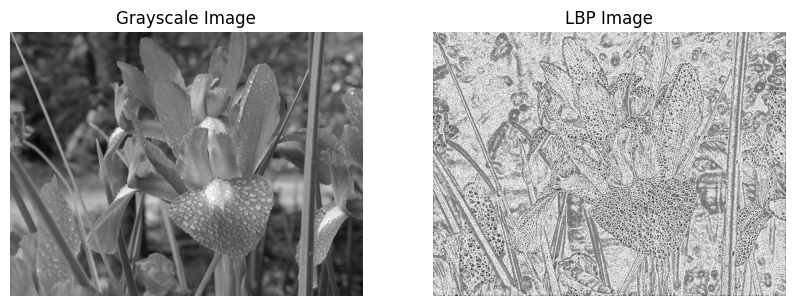

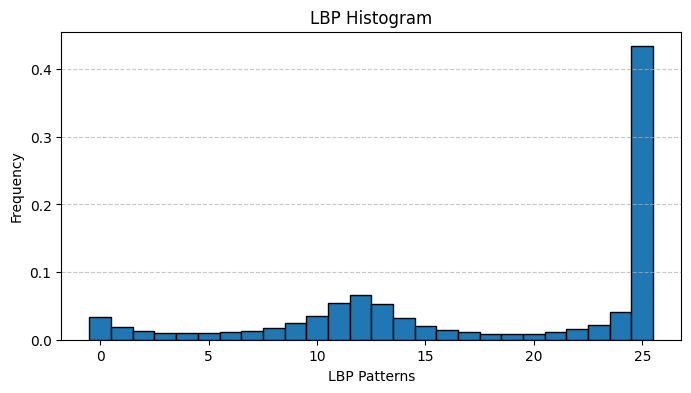

In [ ]:
from skimage.feature import local_binary_pattern

# Function to compute LBP
def compute_lbp(gray_image, radius, n_points, method='uniform'):
    lbp = local_binary_pattern(gray_image, n_points, radius, method)
    return lbp

# Function to compute and visualize LBP histogram
def plot_lbp_histogram(lbp_image, n_bins, uniform=True):
    # Compute histogram
    hist, bins = np.histogram(
        lbp_image.ravel(),
        bins=n_bins,
        range=(0, n_bins),
        density=True
    )

    # Plot histogram
    plt.figure(figsize=(8, 4))
    plt.bar(bins[:-1], hist, width=1, edgecolor="k", align='center')
    plt.title("LBP Histogram")
    plt.xlabel("LBP Patterns")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


radius=3

gray_image = cv2.imread("flower.tif", cv2.IMREAD_GRAYSCALE)

# Compute number of points
n_points = 8 * radius  # 8 neighbors for a circular LBP at given radius

# Compute LBP
lbp_image = compute_lbp(gray_image, radius, n_points, 'uniform')

# Visualize the original grayscale and LBP images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title("LBP Image")
plt.axis('off')
plt.show()

# Plot the histogram of LBP patterns
n_bins = n_points + 2
plot_lbp_histogram(lbp_image, n_bins)



# 3. Fourier Power Spectrum

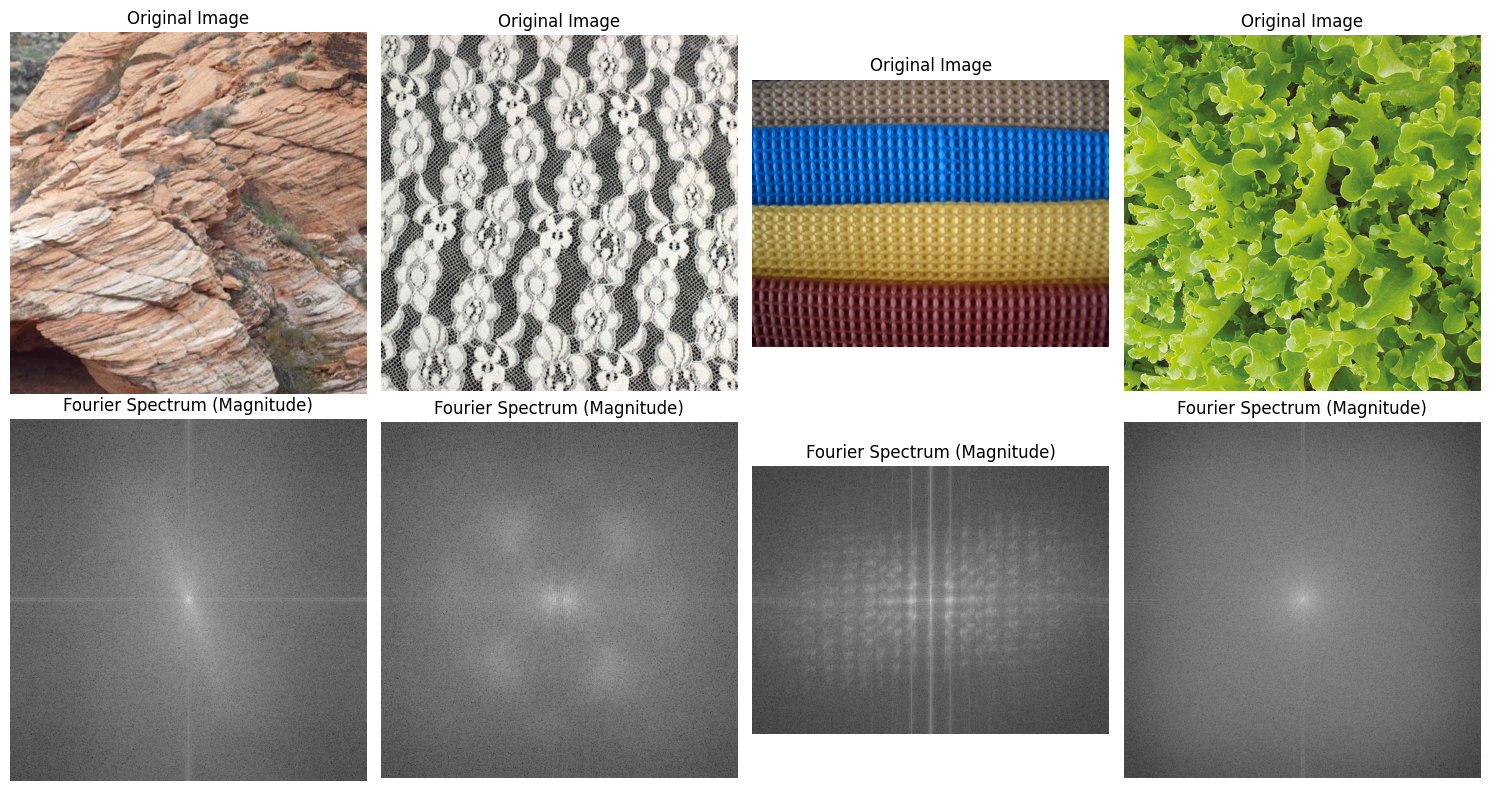

In [ ]:
# Load four texture images
image_paths = [
    'stratified.jpg',  # Replace with your image paths
    'lacelike.jpg',
    'waffled.jpg',
    'frilly.jpg'
]

images = [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) for img_path in image_paths]

# Function to compute the Fourier Power Spectrum
def compute_fourier_spectrum(image):
    # Convert to grayscale if necessary
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Compute the 2D Fourier transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift zero frequency to the center
    magnitude_spectrum = np.log1p(np.abs(f_shift))  # Compute log magnitude
    return magnitude_spectrum

# Compute Fourier Power Spectrum for each image
spectra = [compute_fourier_spectrum(img) for img in images]

# Plot original images and their Fourier Power Spectrum in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i in range(4):
    # Original image
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].set_title('Original Image')
    axes[0, i].axis('off')

    # Fourier Power Spectrum
    axes[1, i].imshow(spectra[i], cmap='gray')
    axes[1, i].set_title(f'Fourier Spectrum (Magnitude)')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


# 4. FFT Features of the Texture Image

Ring Features: [539977212.9918442, 337695747.8747351, 195119079.31943926, 82432477.10082932, 12394101.166018143]
Wedge Features: [211899880.1600157, 76820510.03029639, 103368520.44537228, 206617830.63555032, 181913465.2426715, 76968832.86460595, 103528202.1088168, 206501429.9655372]


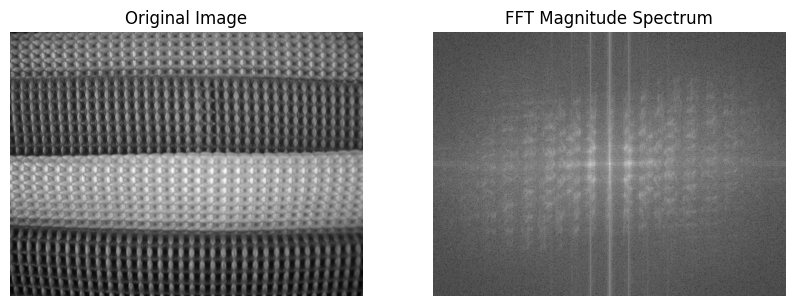

In [ ]:
def compute_fft_features(image, num_rings=5, num_wedges=8):
    # Compute FFT and shift zero frequency to center
    fft = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft)
    magnitude_spectrum = np.abs(fft_shifted)

    # Get image dimensions and center
    h, w = image.shape
    cy, cx = h // 2, w // 2
    max_radius = int(np.sqrt(cy**2 + cx**2))

    # Create radius and angle maps
    y, x = np.ogrid[:h, :w]
    radius = np.sqrt((y - cy)**2 + (x - cx)**2)
    angle = np.arctan2(y - cy, x - cx) % (2 * np.pi)

    # Compute ring features
    ring_edges = np.linspace(0, max_radius, num_rings + 1)
    ring_features = [
        magnitude_spectrum[(radius >= ring_edges[i]) & (radius < ring_edges[i + 1])].sum()
        for i in range(num_rings)
    ]

    # Compute wedge features
    wedge_edges = np.linspace(0, 2 * np.pi, num_wedges + 1)
    wedge_features = [
        magnitude_spectrum[(angle >= wedge_edges[i]) & (angle < wedge_edges[i + 1])].sum()
        for i in range(num_wedges)
    ]

    return ring_features, wedge_features

# Load the grayscale image
image_path = "waffled.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Extract FFT features
num_rings = 5  # Number of rings
num_wedges = 8  # Number of wedges
ring_features, wedge_features = compute_fft_features(image, num_rings, num_wedges)

# Visualize features
print("Ring Features:", ring_features)
print("Wedge Features:", wedge_features)

# Plot original image and FFT spectrum
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# FFT magnitude spectrum
fft = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft)
magnitude_spectrum = 20 * np.log(np.abs(fft_shifted) + 1)  # Log scaling for visualization

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis('off')

plt.show()


# 5. Gabor Features

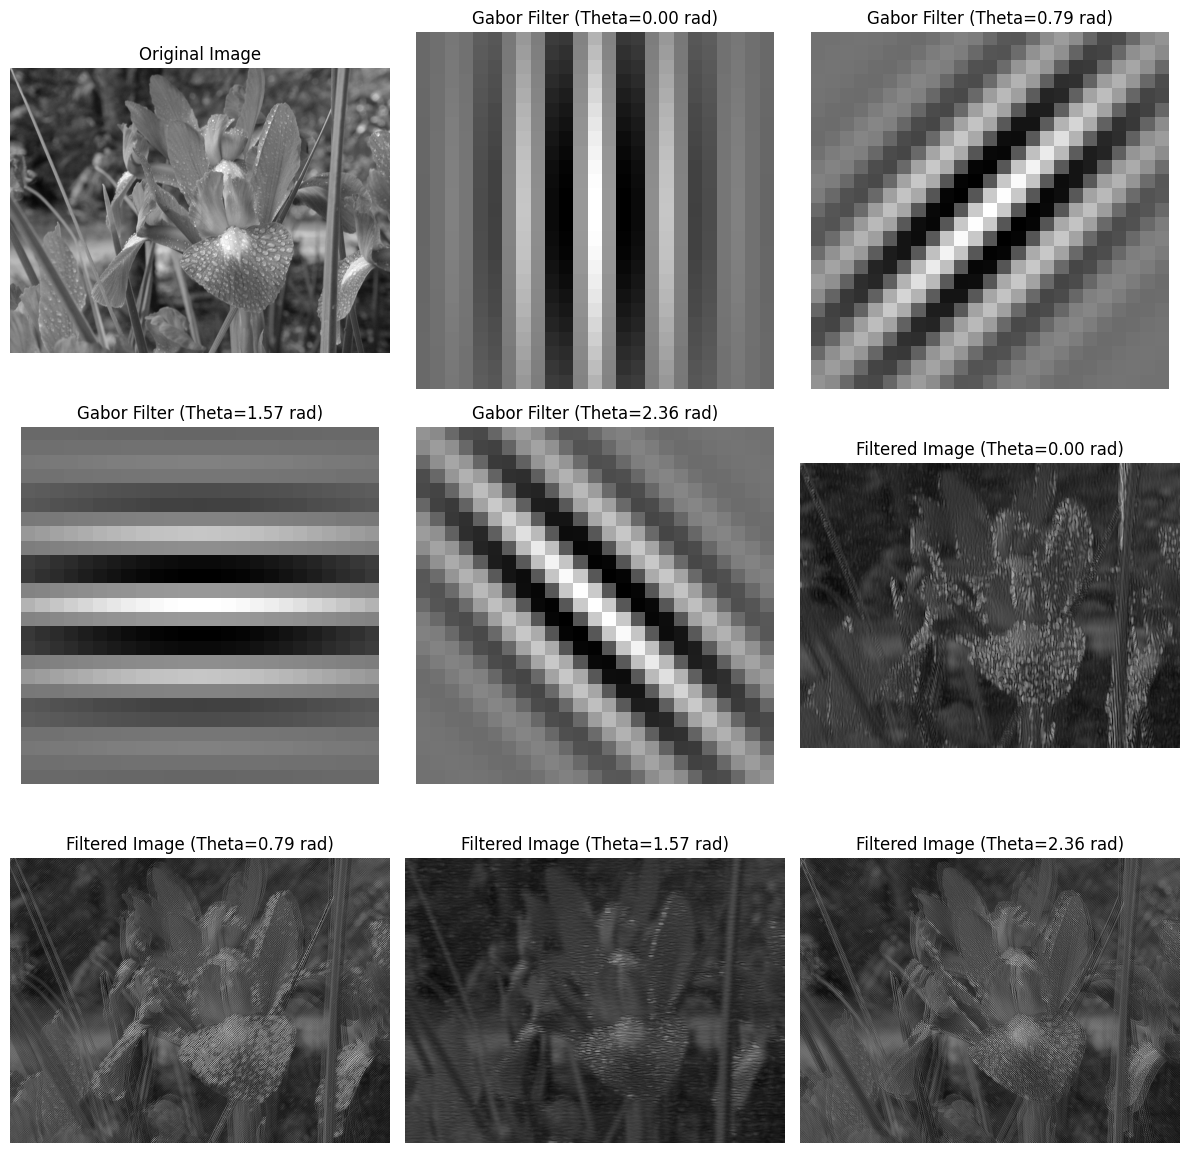

Gabor Features:
Orientation 0.00 rad: Mean=56.66, Std=50.44
Orientation 0.79 rad: Mean=69.33, Std=49.23
Orientation 1.57 rad: Mean=51.84, Std=33.75
Orientation 2.36 rad: Mean=67.25, Std=37.94


In [ ]:
# Function to create a Gabor filter
def gabor_kernel(ksize, sigma, theta, lambd, gamma, psi):
    gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    return gabor

# Parameters for the Gabor filters
ksize = 25  # Size of the Gabor filter
sigma = 5.0  # Standard deviation of the Gaussian envelope
lambd = 5.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Aspect ratio
psi = 0  # Phase offset
orientations = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Different orientations

# Load the image in grayscale
image = cv2.imread('flower.tif', cv2.IMREAD_GRAYSCALE)

# Apply Gabor filters with different orientations
filtered_images = []
kernels = []
gabor_features = []
for theta in orientations:
    kernel = gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)
    filtered = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    mean = filtered.mean()
    std = filtered.std()
    gabor_features.append((mean, std))
    filtered_images.append(filtered)
    kernels.append(kernel)

# Visualize the original image, Gabor kernels, and filtered results
plt.figure(figsize=(12, 12))

# Original image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gabor kernels and filtered images
for i, (kernel, filtered) in enumerate(zip(kernels, filtered_images)):
    plt.subplot(3, 3, 2 + i)
    plt.title(f"Gabor Filter (Theta={orientations[i]:.2f} rad)")
    plt.imshow(kernel, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 3, 6 + i)
    plt.title(f"Filtered Image (Theta={orientations[i]:.2f} rad)")
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Gabor Features:")
for i, (mean, std) in enumerate(gabor_features):
    print(f"Orientation {orientations[i]:.2f} rad: Mean={mean:.2f}, Std={std:.2f}")
